In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
train_data = pd.read_csv('WineQT.csv', index_col='Id')
train_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Little EDA to check for imbalance in Dataset

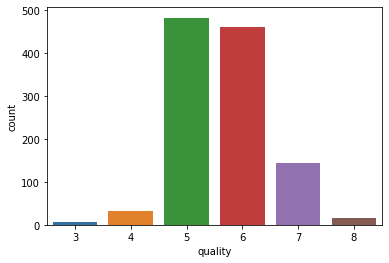

In [5]:
sns.countplot(x='quality', data = train_data)

In [6]:
X = train_data.drop('quality',axis=1)
y = train_data.quality

In [7]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
Id,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


# Functions

In [8]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score

def get_score_classifier(n_estimators, X_t, y_t):
    """
    Implements a Random Forest Classification

    Arguments:
    n_estimators -- estimator value
    X_t -- input data (data for training)
    y_t -- label data (prediction training data)

    Returns:
    score -- mean recall_weighted score for each estimator
    """
    
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=0)
    score = cross_val_score(rf_model, X_t,y_t, cv=5, scoring='recall_weighted')
    return score.mean()


def get_score_regressor(n_estimators, X_t, y_t):
    """
    Implements a Random Forest Regression

    Arguments:
    n_estimators -- estimator value
    X_t -- input data (data for training)
    y_t -- label data (prediction training data)

    Returns:
    score -- mean mean_absolute_error score for each estimator
    """
    
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=0)
    score = -1* cross_val_score(rf_model, X_t,y_t, cv=5, scoring='neg_mean_absolute_error')
    return score.mean()

C:\DataScience\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\DataScience\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\DataScience\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [11]:
def get_results(method, X_t, y_t):
    results = {}
    for i in range(1,9):
        results[50*i] = method(50*i, X_t, y_t)
    return results 

In [12]:
def show_plot(results):
    """
    Shows a metric vs estimator plot

    Argument:
    results -- estimators and corresponding metric score (gotten from get_score_classifier or get_score_regressor)

    """

    plt.plot(list(results.keys()), list(results.values()))
    plt.show()

In [7]:
# results = {}
# for i in range(1,9):
#     results[50*i] = get_score_classifier(50*i, X_t=X, y_t=y)

In [13]:
results = get_results(get_score_classifier, X_t=X, y_t=y)

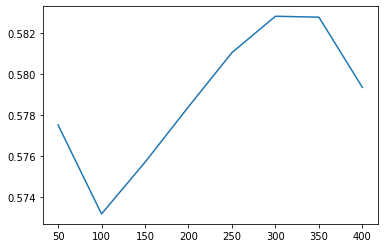

In [14]:
show_plot(results=results)

In [ ]:
# results = {}
# for i in range(1,9):
#     results[50*i] = get_score_regressor(50*i, X_t=X, y_t=y)

In [15]:
results = get_results(method=get_score_regressor, X_t=X, y_t=y)

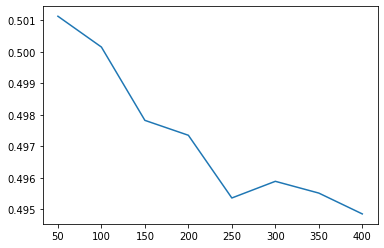

In [16]:
show_plot(results=results)

In [19]:
mae_at_best_estimator = results[400]

print(mae_at_best_estimator)

0.49485214127020605


### Using n_estimator=400 for RandomForestRegressor

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=1)


main_regressor_model = RandomForestRegressor(n_estimators=400, random_state=0)
main_regressor_model.fit(X_train, y_train)
main_reg_predictions = main_regressor_model.predict(X_valid)

In [18]:
from sklearn.metrics import mean_absolute_error

print("MAE for Regression: ", mean_absolute_error(y_valid, main_reg_predictions))

MAE for Regression:  0.41492358078602626


### Using n_estimators=300 for RandomForestClassifier

In [20]:
from sklearn.metrics import classification_report

main_classification_model = RandomForestClassifier(n_estimators=300, random_state=0)
main_classification_model.fit(X_train, y_train)
main_class_predictions = main_classification_model.predict(X_valid)

print("Classification Report: \n")
print(classification_report(y_valid, main_class_predictions))

# poor classification result and error arises because of imbalance in data, some y_train values don't occur in y_valid values

Classification Report: 

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         3
           5       0.74      0.76      0.75        97
           6       0.65      0.69      0.67        95
           7       0.58      0.54      0.56        28
           8       1.00      0.17      0.29         6

    accuracy                           0.68       229
   macro avg       0.59      0.43      0.45       229
weighted avg       0.68      0.68      0.67       229



C:\DataScience\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
train_data['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

## Making dataset balanced by using _upsampled_ method

In [22]:
from sklearn.utils import resample

df_majority = train_data[(train_data['quality'] == 5)]
df_minority_6 = train_data[(train_data['quality'] == 6)]
df_minority_7 = train_data[(train_data['quality'] == 7)]
df_minority_4 = train_data[(train_data['quality'] == 4)]
df_minority_8 = train_data[(train_data['quality'] == 8)]
df_minority_3 = train_data[(train_data['quality'] == 3)]

df_minority_upsampled_6 = resample(df_minority_6, replace=True, n_samples=483, random_state=42)
df_minority_upsampled_7 = resample(df_minority_7, replace=True, n_samples=483, random_state=42)
df_minority_upsampled_4 = resample(df_minority_4, replace=True, n_samples=483, random_state=42)
df_minority_upsampled_8 = resample(df_minority_8, replace=True, n_samples=483, random_state=42)
df_minority_upsampled_3 = resample(df_minority_3, replace=True, n_samples=483, random_state=42)


df_upsampled = pd.concat([df_minority_upsampled_6,df_minority_upsampled_7,df_minority_upsampled_4,df_minority_upsampled_8,df_minority_upsampled_3, df_majority])

In [23]:
df_upsampled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
426,6.4,0.67,0.08,2.1,0.045,19.0,48.0,0.99490,3.49,0.49,11.4,6
1528,7.9,0.29,0.49,2.2,0.096,21.0,59.0,0.99714,3.31,0.67,10.1,6
1258,6.8,0.64,0.00,2.7,0.123,15.0,33.0,0.99538,3.44,0.63,11.3,6
1041,6.9,0.49,0.19,1.7,0.079,13.0,26.0,0.99547,3.38,0.64,9.8,6
436,8.0,0.67,0.30,2.0,0.060,38.0,62.0,0.99580,3.26,0.56,10.2,6


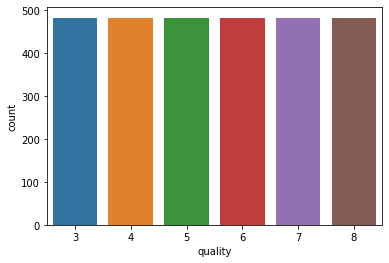

In [24]:
sns.countplot(x='quality', data=df_upsampled)

In [25]:
X_upsampled = df_upsampled.drop('quality', axis=1)
y_upsampled = df_upsampled.quality

In [26]:
results_upsampled_classifier = get_results(method=get_score_classifier, X_t=X_upsampled, y_t=y_upsampled)


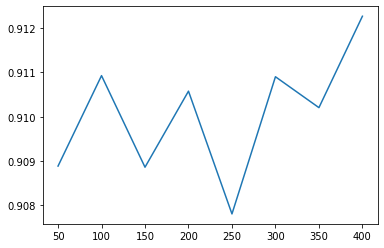

In [27]:
show_plot(results=results_upsampled_classifier)

In [28]:
results_upsampled_regression = get_results(method=get_score_regressor, X_t=X_upsampled, y_t=y_upsampled)

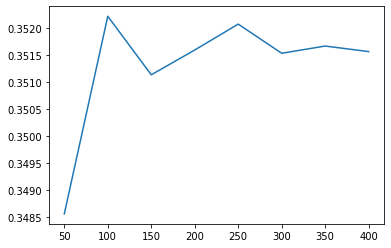

In [29]:
show_plot(results=results_upsampled_regression)

In [30]:
X_train_upsampled, X_valid_upsampled, y_train_upsampled, y_valid_upsampled = train_test_split(X_upsampled, y_upsampled, train_size=0.8, test_size=0.2, random_state=1)

In [31]:
upsampled_classification_model = RandomForestClassifier(n_estimators=250, random_state=0)
upsampled_classification_model.fit(X_train_upsampled, y_train_upsampled)
upsampled_class_predictions = upsampled_classification_model.predict(X_valid_upsampled)

print("Classification Report: \n")
print(classification_report(y_valid_upsampled, upsampled_class_predictions))

Classification Report: 

              precision    recall  f1-score   support

           3       0.97      1.00      0.98        94
           4       0.97      1.00      0.99       101
           5       0.85      0.80      0.83        97
           6       0.84      0.80      0.82        97
           7       0.95      0.98      0.96        93
           8       1.00      1.00      1.00        98

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



In [32]:
upsample_regressor_model = RandomForestRegressor(n_estimators=50, random_state=0)
upsample_regressor_model.fit(X_train_upsampled, y_train_upsampled)
upsample_reg_predictions = upsample_regressor_model.predict(X_valid_upsampled)

print("MAE score for upsample Regression: ", mean_absolute_error(y_valid_upsampled, upsample_reg_predictions))

MAE score for upsample Regression:  0.12279310344827583


**Here is a far better performance obtained by upsampling the dataset to make it balanced**